<>:161: SyntaxWarning: invalid escape sequence '\p'
<>:161: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Admin\AppData\Local\Temp\ipykernel_18136\2594403101.py:161: SyntaxWarning: invalid escape sequence '\p'
  ax2.set_title('Figura 2: Espectro de Energia dos Orbitais $\pi$')


--- Matriz Hamiltoniana (H) ---
[[ 0.5 -0.9  0.   0.   0.  -0.9]
 [-0.9  0.  -1.   0.   0.   0. ]
 [ 0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0. ]
 [ 0.   0.   0.  -1.   0.  -1. ]
 [-0.9  0.   0.   0.  -1.   0. ]]
-----------------------------------

--- Tabela 1: Autovalores e Ocupações ---
μ   | E_μ (em β_cc) | Ocupação
----|---------------|-----------
 1  |    -1.8872    |     2    
 2  |    -1.0000    |     2    
 3  |    -0.7574    |     2     (HOMO)
 4  |    1.0000     |     0     (LUMO)
 5  |    1.1192     |     0    
 6  |    2.0254     |     0    

Gap de energia (E_LUMO - E_HOMO) = 1.7574 β_cc
----------------------------------------

--- Tabela 2: Populações por Sítio (q_i) ---
Sítio | Átomo | População (q_i)
------|-------|----------------
  1   |   N   |   0.7824
  2   |   C   |   1.0845
  3   |   C   |   0.9954
  4   |   C   |   1.0578
  5   |   C   |   0.9954
  6   |   C   |   1.0845
-----------------------------------------
Soma total das populações: 6.

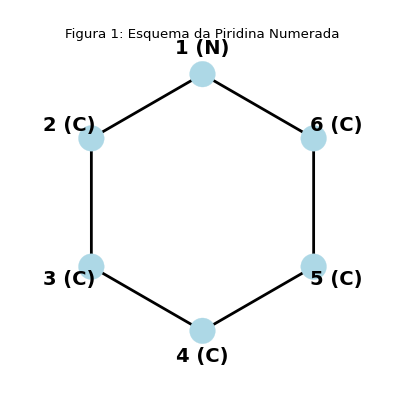

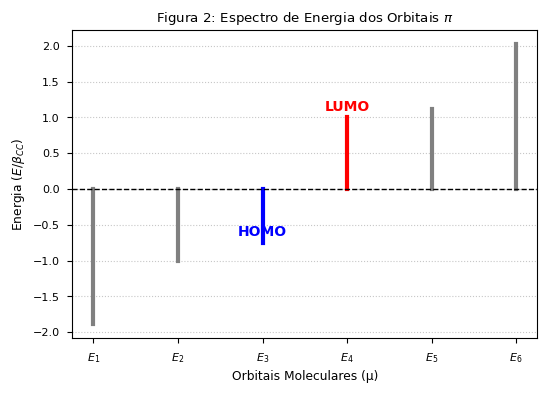

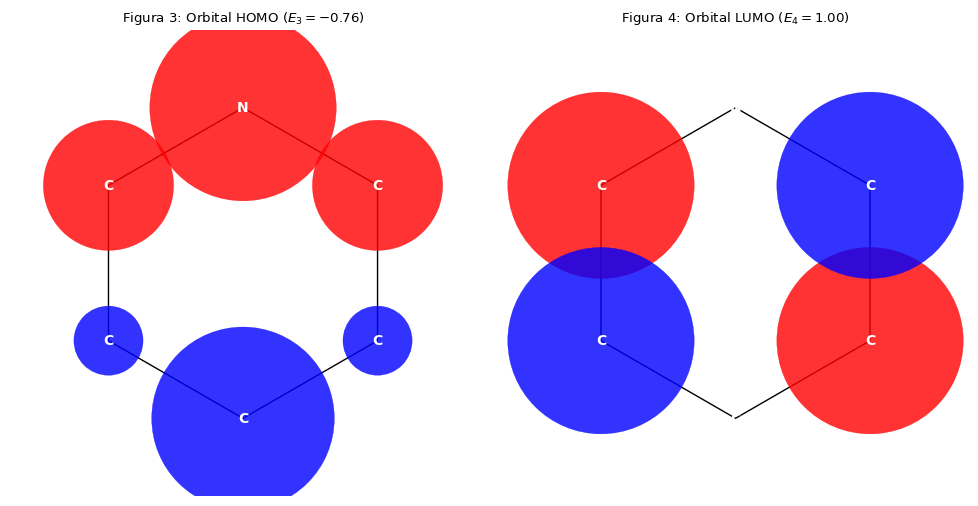

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# --- 1. Definição dos Parâmetros ---
# Parâmetros de Hückel para a piridina, conforme especificado no problema.
# Energias medidas em unidades de beta_CC.
alpha_N = 0.50
alpha_C = 0.00
beta_CN = -0.90
beta_CC = -1.00

# --- 2. Construção da Matriz Hamiltoniana ---
# A numeração é 1=N, 2=C, 3=C, 4=C, 5=C, 6=C no sentido horário.
# Em Python (índice 0), N=0, C=1, ..., C=5.
H = np.zeros((6, 6))

# Elementos da diagonal
H[0, 0] = alpha_N
for i in range(1, 6):
    H[i, i] = alpha_C

# Elementos fora da diagonal (acoplamentos de 1os vizinhos)
# Ligações C-N
H[0, 1] = H[1, 0] = beta_CN
H[0, 5] = H[5, 0] = beta_CN
# Ligações C-C
H[1, 2] = H[2, 1] = beta_CC
H[2, 3] = H[3, 2] = beta_CC
H[3, 4] = H[4, 3] = beta_CC
H[4, 5] = H[5, 4] = beta_CC

print("--- Matriz Hamiltoniana (H) ---")
print(np.round(H, 3))
print("-" * 35 + "\n")


# --- 3. Diagonalização e Análise dos Autovalores/Autovetores ---
# A função eigh é ideal para matrizes hermitianas (reais e simétricas neste caso).
# Ela retorna os autovalores e autovetores já ordenados.
eigenvalues, eigenvectors = np.linalg.eigh(H)

# A piridina tem 6 elétrons pi (um de cada átomo do anel).
# Com 2 elétrons por orbital, os 3 orbitais de menor energia são ocupados.
num_pi_electrons = 6
num_occupied_orbitals = num_pi_electrons // 2

# Identificação do HOMO e LUMO
# Índices em Python: 0, 1, 2 são ocupados.
homo_index = num_occupied_orbitals - 1
lumo_index = num_occupied_orbitals
homo_energy = eigenvalues[homo_index]
lumo_energy = eigenvalues[lumo_index]
energy_gap = lumo_energy - homo_energy

# --- 4. Geração de Tabelas (Saída no Console) ---

# Tabela de Autovalores e Ocupações
print("--- Tabela 1: Autovalores e Ocupações ---")
print("μ   | E_μ (em β_cc) | Ocupação")
print("----|---------------|-----------")
for i, E in enumerate(eigenvalues):
    occupation = 2 if i < num_occupied_orbitals else 0
    marker = ""
    if i == homo_index:
        marker = " (HOMO)"
    elif i == lumo_index:
        marker = " (LUMO)"
    print(f"{i+1:^4}| {E:^13.4f} | {occupation:^9}{marker}")
print(f"\nGap de energia (E_LUMO - E_HOMO) = {energy_gap:.4f} β_cc")
print("-" * 40 + "\n")


# Cálculo das populações por sítio (densidade eletrônica)
# q_i = sum_{mu_ocup} 2 * |c_i^(mu)|^2
populations = np.zeros(6)
for i in range(6): # Itera sobre os sítios
    for mu in range(num_occupied_orbitals): # Itera sobre os orbitais ocupados
        populations[i] += 2 * (eigenvectors[i, mu]**2)

print("--- Tabela 2: Populações por Sítio (q_i) ---")
print("Sítio | Átomo | População (q_i)")
print("------|-------|----------------")
print(f"  1   |   N   |   {populations[0]:.4f}")
for i in range(1, 6):
    print(f"  {i+1}   |   C   |   {populations[i]:.4f}")
print("-----------------------------------------")
print(f"Soma total das populações: {np.sum(populations):.4f} (esperado: {num_pi_electrons})")
print("-" * 40 + "\n")


# Cálculo das ordens de ligação
# p_ij = sum_{mu_ocup} 2 * c_i^(mu) * c_j^(mu)
bond_orders = {}
bonds = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 0)]
for i, j in bonds:
    order = 0
    for mu in range(num_occupied_orbitals):
        order += 2 * eigenvectors[i, mu] * eigenvectors[j, mu]
    bond_orders[f"{i+1}-{j+1}"] = order

print("--- Tabela 3: Ordens de Ligação (p_ij) ---")
print("Ligação | Tipo | Ordem de Ligação (p_ij)")
print("--------|------|-------------------------")
# Ligações C-N
print(f"  1-2   | C-N  |        {bond_orders['1-2']:.4f}")
print(f"  6-1   | C-N  |        {bond_orders['6-1']:.4f}")
# Ligações C-C
print(f"  2-3   | C-C  |        {bond_orders['2-3']:.4f}")
print(f"  3-4   | C-C  |        {bond_orders['3-4']:.4f}")
print(f"  4-5   | C-C  |        {bond_orders['4-5']:.4f}")
print(f"  5-6   | C-C  |        {bond_orders['5-6']:.4f}")
print("-" * 40 + "\n")


# --- 5. Geração das Figuras ---

plt.style.use('seaborn-v0_8-paper') # Estilo para publicações

# Figura 1: Esquema da Piridina Numerada
fig1, ax1 = plt.subplots(figsize=(5, 5))
ax1.set_aspect('equal')
ax1.axis('off')
hexagon = patches.RegularPolygon((0, 0), numVertices=6, radius=1,
                                 edgecolor='black', facecolor='none', lw=2)
ax1.add_patch(hexagon)
positions = np.array([
    [np.cos(np.pi/2 + n * 2*np.pi/6), np.sin(np.pi/2 + n * 2*np.pi/6)]
    for n in range(6)
])
labels = ['1 (N)', '2 (C)', '3 (C)', '4 (C)', '5 (C)', '6 (C)']
for i, pos in enumerate(positions):
    ax1.text(pos[0]*1.2, pos[1]*1.2, labels[i], ha='center', va='center', fontsize=14, weight='bold')
    ax1.add_patch(patches.Circle(pos, radius=0.1, color='lightblue'))
ax1.set_xlim(-1.5, 1.5)
ax1.set_ylim(-1.5, 1.5)
ax1.set_title("Figura 1: Esquema da Piridina Numerada", y=1.0, pad=-20)
plt.savefig("esquema_piridina.png", dpi=300, bbox_inches='tight')
print("Figura 1 (esquema_piridina.png) salva.")

# Figura 2: Stick Plot do Espectro de Energia
fig2, ax2 = plt.subplots(figsize=(6, 4))
for i, E in enumerate(eigenvalues):
    color = 'gray'
    label = None
    if i == homo_index:
        color = 'blue'
        label = 'HOMO'
    elif i == lumo_index:
        color = 'red'
        label = 'LUMO'
    ax2.plot([i, i], [0, E], color=color, lw=3)
    if label:
        ax2.text(i, E + 0.1, label, ha='center', color=color, weight='bold')

ax2.axhline(0, color='black', ls='--', lw=1)
ax2.set_xticks(range(6))
ax2.set_xticklabels([f'$E_{i+1}$' for i in range(6)])
ax2.set_ylabel('Energia ($E/\\beta_{CC}$)')
ax2.set_xlabel('Orbitais Moleculares (μ)')
ax2.set_title('Figura 2: Espectro de Energia dos Orbitais $\pi$')
ax2.grid(axis='y', linestyle=':', alpha=0.7)
plt.savefig("espectro_energia.png", dpi=300, bbox_inches='tight')
print("Figura 2 (espectro_energia.png) salva.")

# Função para criar os mapas de orbitais (diagramas "bolha")
def plot_orbital_map(ax, title, positions, coefficients):
    ax.set_aspect('equal')
    ax.axis('off')
    hexagon = patches.RegularPolygon((0, 0), numVertices=6, radius=1,
                                     edgecolor='black', facecolor='none', lw=1)
    ax.add_patch(hexagon)
    
    max_coeff = np.max(np.abs(coefficients))
    
    for i, pos in enumerate(positions):
        coeff = coefficients[i]
        radius = 0.6 * np.abs(coeff) / max_coeff # Raio proporcional ao |c_i|
        color = 'red' if coeff > 0 else 'blue' # Cor/sinal para a fase
        
        # Desenha o círculo (bolha)
        circle = patches.Circle(pos, radius=radius, color=color, alpha=0.8)
        ax.add_patch(circle)
        
        # Adiciona o rótulo do átomo
        label = 'N' if i == 0 else 'C'
        ax.text(pos[0], pos[1], label, ha='center', va='center', color='white', weight='bold', fontsize=10)

    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.set_title(title)

# Figura 3 e 4: Mapas HOMO e LUMO
fig3, (ax3, ax4) = plt.subplots(1, 2, figsize=(10, 5))

# Mapa HOMO
homo_coeffs = eigenvectors[:, homo_index]
plot_orbital_map(ax3, f"Figura 3: Orbital HOMO ($E_{homo_index+1}={homo_energy:.2f}$)", positions, homo_coeffs)

# Mapa LUMO
lumo_coeffs = eigenvectors[:, lumo_index]
plot_orbital_map(ax4, f"Figura 4: Orbital LUMO ($E_{lumo_index+1}={lumo_energy:.2f}$)", positions, lumo_coeffs)

plt.tight_layout()
plt.savefig("mapas_homo_lumo.png", dpi=300, bbox_inches='tight')
print("Figuras 3 e 4 (mapas_homo_lumo.png) salvas.")

plt.show() # Mostra as figuras na tela
